In [2]:
# Import libarys
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import PolynomialFeatures
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [3]:
# Import the dataset
root = '/Users/Haydn/Documents/Code/Jupyter/Machine Learning A-Z/1.0 - Example Data/'
data_file = root + 'Part 2 - Regression/Support Vector Regression (SVR)/Position_Salaries.csv'
dataset = pd.read_csv(data_file)
'''
SVR is designed to have a threshold for error and minimise and value exceeding
that threshold.
Whereas linear regression tries to minimus the error between the prediciton and data.
Almost like having support and resistance lines in trading.

So this data set shows the levels of employess and the salary you
get at that level.

So now when we hire emplyees we can check them against our salary curve.
E.g - An Regional Manager with two yrs experience on their way to Partner.
      We can say they're 6.5 and check the salary on our graph.
''' 
dataset

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


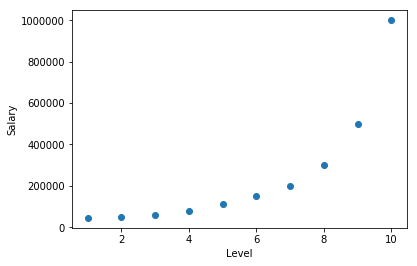

In [5]:
# Splitting features and outcomes
x = dataset.iloc[:, 1:2].values
y = dataset.iloc[:, -1:].values

plt.scatter(x, y)
plt.xlabel("Level")
plt.ylabel("Salary")
plt.show()